# Stochastic Simulation Coursework 3
## 2022.12.14

#### CID: 01868678

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1: Sample an Interesting Chain

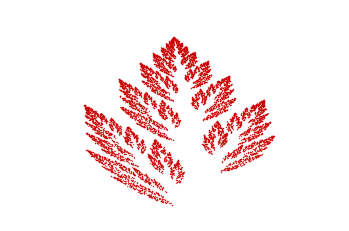

In [2]:
# define initail values
w = np.array([0.2993, 0.7007])
A1 = np.array([[0.4, -0.3733], [0.06, 0.6]])
A2 = np.array([[-0.8, -0.1867], [0.1371, 0.8]])
b1 = np.array([0.3533, 0])
b2 = np.array([1.1, 0.1])

x0 = np.array([0, 0])
N = 10000

# define functions f_1 and f_2
def f1(x):
    return A1@x + b1
def f2(x):
    return A2@x + b2

# generate Markov chain
x = [x0, ]
x1 = [x0[0], ]
x2 = [x0[1], ]
xold = x0
for i in range(N):
    a = np.random.choice(np.array([1, 2]), p = w)
    if a == 1:
        xi = f1(xold)
    else:
        xi = f2(xold)
    xold = xi
    x.append(xi)
    x1.append(xi[0])
    x2.append(xi[1])

# plot scatter plot
plt.scatter(x1[20:N+1], x2[20:N+1], s=0.1, color = [0.8, 0, 0])
plt.gca ().spines['top']. set_visible (False)
plt.gca ().spines['right']. set_visible (False)
plt.gca ().spines['bottom']. set_visible (False)
plt.gca ().spines['left']. set_visible (False)
plt.gca (). set_xticks ([])
plt.gca (). set_yticks ([])
plt.gca ().set_xlim(0, 1.05)
plt.gca ().set_ylim(0, 1)
plt.show ()

## Q2: Sample a State-space Model

### 1. Simulate a Gaussian time-series corrupted by noise.

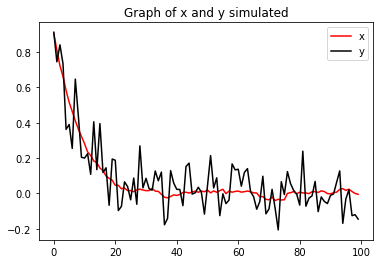

In [40]:
# define initial values
x0 = 1
a = 0.9
sigmax = 0.01
sigmay = 0.1
T = 100

# simulate the time series
xold = x0
x = []
y = []
for i in range(T):
    xnew = np.random.normal(a*xold, sigmax)
    ynew = np.random.normal(xnew, sigmay)
    xold = xnew
    x.append(xnew)
    y.append(ynew)

# plot x and y
plt.plot(x, color='r',label='x')
plt.plot(y, color='k',label='y')
plt.title("Graph of x and y simulated")
plt.legend()
plt.show()

For example, $x$ represent a general decreasing trend of stock price and $y$ is the stock price estimation with randomness.

### 2. Develop a stochastic volatility model and simulate.

##### State-Space Model

Choose $x$ as a decaying system and choose folded Guassian distribution as a Markov transition kernel. We have $x_t = |z_t|$ indicates the volatility and $y_t$ indicates the return.

$$
z_t|x_{t-1} \sim \mathcal{N} \left(z_t; ax_{t-1}, \sigma_x^2\right)
\\
\\
y_t|x_t \sim \mathcal{N} \left(y_t; \mu_y, x_t^2\right)
$$

where $f_x$ is the probability density function of $\mathcal{N} \left(x_t; ax_{t-1}, \sigma_x^2\right)$. So this simulates a decreasing volatility and a return become more stable when $t$ goes large. Choose initial values $a = 0.99$, $\sigma_x = 0.001$, $x_0 = 1$ and $\mu_y = 0$, $\mu_y = 1$.

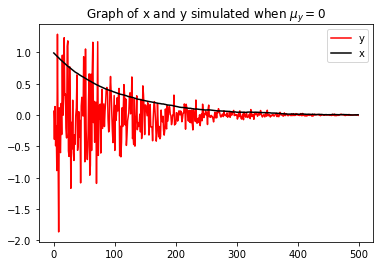

In [52]:
# define initial values
xold = 1
sigmax = 0.001
a = 0.99
muy = 0

# simulate the time series
x = []
y = []
for i in range(500):
    xnew = np.abs(np.random.normal(a*xold, sigmax))
    ynew = np.random.normal(muy, xnewt
    xold = xnew
    x.append(xnew)
    y.append(ynew)
    
# plot x and y
plt.plot(y, color='r',label='y')
plt.plot(x, color='k',label='x')
plt.title("Graph of x and y simulated when $\mu_y = 0$")
plt.legend()
plt.show()

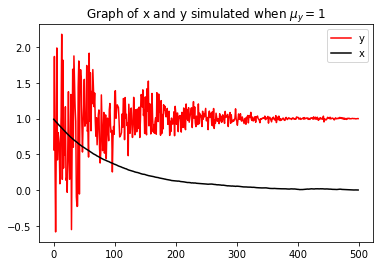

In [53]:
# define initial values
xold = 1
sigmax = 0.001
a = 0.99
muy = 1

# simulate the time series
x = []
y = []
for i in range(500):
    xnew = np.abs(np.random.normal(a*xold, sigmax))
    ynew = np.random.normal(muy, xnew)
    xold = xnew
    x.append(xnew)
    y.append(ynew)
    
# plot x and y
plt.plot(y, color='r',label='y')
plt.plot(x, color='k',label='x')
plt.title("Graph of x and y simulated when $\mu_y = 1$")
plt.legend()
plt.show()

##### Observation-Driven Model

Choose observation-driven model Exponentially Weighted Moving Average (EWMA) as the volatility model. Therefore we have

$$
\sigma^2_t = \lambda \sigma^2_{t-1} + \left(1-\lambda \right)y_{n-1}^2
\\
y_t|\sigma_t \sim \mathcal{N} \left(y_t; \mu_y, \sigma_t^2\right)
$$

where $\sigma_t$ indicates the volatility and $y_t$ indicates the return. So this simulates a volatility affected by both its previous value and the previous return. Choose initial values $\lambda = 0.5$, $\sigma_0 = 1$ and $\mu_y = 0$, $\mu_y = 1$.

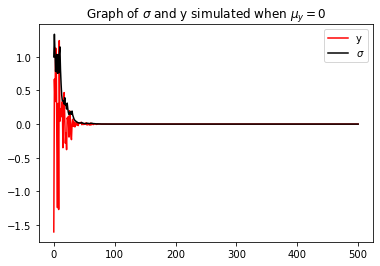

In [49]:
# define initial values
muy = 0
lamb = 0.5
sigma0 = 1

# simulate the time series
sigma = [sigma0, ]
y = [np.random.normal(muy, sigma[0]), ]
for i in range(500):
    sigmanew = np.sqrt(lamb*(sigma[i]**2) + (1-lamb)*(y[i]**2)) 
    ynew = np.random.normal(muy, sigmanew)
    sigma.append(sigmanew)
    y.append(ynew)
    
# plot x and y
plt.plot(y, color='r',label='y')
plt.plot(sigma, color='k',label='$\sigma$')
plt.title("Graph of $\sigma$ and y simulated when $\mu_y = 0$")
plt.legend()
plt.show()

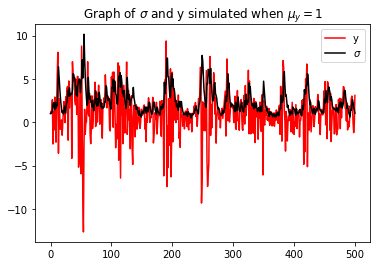

In [50]:
# define initial values
muy = 1
lamb = 0.5
sigma0 = 1

# simulate the time series
sigma = [sigma0, ]
y = [np.random.normal(muy, sigma[0]), ]
for i in range(500):
    sigmanew = np.sqrt(lamb*(sigma[i]**2) + (1-lamb)*(y[i]**2)) 
    ynew = np.random.normal(muy, sigmanew)
    sigma.append(sigmanew)
    y.append(ynew)
    
# plot x and y
plt.plot(y, color='r',label='y')
plt.plot(sigma, color='k',label='$\sigma$')
plt.title("Graph of $\sigma$ and y simulated when $\mu_y = 1$")
plt.legend()
plt.show()

We can see that the observation dirven model is different from state-space model since the volatility $\sigma_t$ also depends on the previous return $y_{t-1}$. When $\mu_y = 0$, the volatility decays faster in observation dirven model as it is almost not affected by randomness provided by the second term $\left(1-\lambda\right)y^2_{t-1}$ especially when $t$ is large. However, when $\mu_y \neq 0$, the state-space model simulate more stable volatility and return when $t$ is large.